# Data Visualisation

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import seaborn as sns  
import pandas.tseries  


## 2.Load Data

In [2]:
#Downloading the database reserved for training
train_data=pd.read_csv('Data/raw train data.txt', sep = ' ', header=None)

#Downloading the database reserved for testing
test_data=pd.read_csv('Data/raw test data.txt', sep = ' ', header=None)

data=['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','26','27']

train_data.columns = data
test_data.columns = data

data=['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
train_data = train_data[data]
test_data = test_data[data]
print('shape of training data =', train_data.shape, ',', 'shape of testing data =', test_data.shape)

shape of training data = (20631, 26) , shape of testing data = (13096, 26)


In [3]:
train_data.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

In [4]:
test_data.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08  23.4166  
3  39.00  23.3737  
4  38.99  23.4130  

[5 rows x 26 columns]

In [5]:
train_data.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

In [6]:
test_data.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

## 3. Creat Label 'TTF'

In [7]:
    #creation of label 'ttf' for train_data
    max_cycles = []
    ids = []
    for m_id in pd.unique(train_data.id):
        max_cycle = train_data[train_data['id'] == m_id]['cycle'].max() #subset of X_data (it designates cycles for each engine individually, and then it takes the maximum value.)
        max_cycles.append(max_cycle)
        ids.append(m_id)

    df_max_cycle = ({'id': ids, 'last_cycle': max_cycles})
    df_max_cycle = pd.DataFrame.from_dict(df_max_cycle)

    train_data = pd.merge(train_data, df_max_cycle, on='id') #add a column 'last_cycle' (data frame ['id','last_cycle']) à X_data: when 'id' matches, it associates its max_cycle (uwill find repetetive lines)
    train_data['ttf'] = train_data['last_cycle'] - train_data['cycle'] #objective:calculate how many cycles remain before failure, from now on i have two extra columns (ttf and max_cycle)
    train_data.drop(['last_cycle'], axis=1, inplace=True) #'last_cycle' was intermediate to creat 'ttf'
    
    
    #creation of label 'ttf' for test_data
    max_cycles = []
    ids = []
    for m_id in pd.unique(test_data.id):
        max_cycle = test_data[test_data['id'] == m_id]['cycle'].max() 
        max_cycles.append(max_cycle)
        ids.append(m_id)

    df_max_cycle = ({'id': ids, 'last_cycle': max_cycles})
    df_max_cycle = pd.DataFrame.from_dict(df_max_cycle)

    test_data = pd.merge(test_data, df_max_cycle, on='id')
    test_data['ttf'] = test_data['last_cycle'] - test_data['cycle'] 
    test_data.drop(['last_cycle'], axis=1, inplace=True)     
  



### Final dataset:

In [8]:
train_data.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       s21  ttf  
0  23.4190  191  
1  23.4236  190  
2  23.3442  189  
3  23.3739  188  
4  23.4044  187  

[5 rows x 27 columns]

In [9]:
test_data.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   
2   1      3    0.0003    0.0001     100.0  518.67  642.46  1586.94  1401.34   
3   1      4    0.0042    0.0000     100.0  518.67  642.44  1584.12  1406.42   
4   1      5    0.0014    0.0000     100.0  518.67  642.51  1587.19  1401.92   

      s5  ...      s13      s14     s15   s16  s17   s18    s19    s20  \
0  14.62  ...  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1  14.62  ...  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2  14.62  ...  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3  14.62  ...  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4  14.62  ...  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   

       s21  ttf  
0  23.3735   30  
1  23.3916   29  
2  23.4166   28  
3  23.3737   27  
4  23.4130   26  

[5 rows x 27 columns]

## 4. Data Preparation

### 4.1 Feature selection

In [10]:
#traindata features preparation
X_train = train_data[['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']]

#testdata features preparation
X_test = test_data[['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']]

### 4.2 define Label

In [11]:
#train data label
y_train=train_data['ttf']
y_test=test_data['ttf']

## 5. Data Visualization

### 5.1 Label Distribution

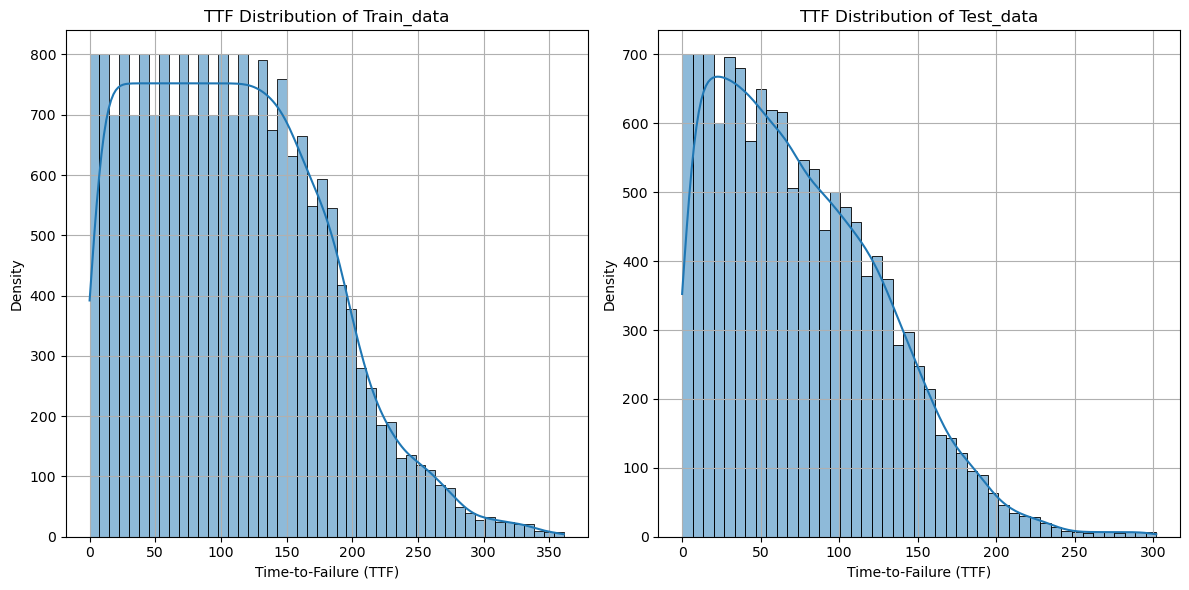

In [12]:
# Create subplots for both train_data['ttf'] and test_data['ttf']
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['ttf'], kde=True)
plt.xlabel('Time-to-Failure (TTF)')
plt.ylabel('Density')
plt.title('TTF Distribution of Train_data')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(test_data['ttf'], kde=True)
plt.xlabel('Time-to-Failure (TTF)')
plt.ylabel('Density')
plt.title('TTF Distribution of Test_data')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

###  Train and test labels are skewed to the left --> apply function to normalize it. 

In [13]:
# Check if any value in the 'ttf' column is negative or null

negative_value = (train_data['ttf'] <= 0).any()

if negative_value:
    print("Train data's ttf has nul or negative values.")
else:
    print("Train data's ttf has no negative value.")
    
negative_value = (test_data['ttf'] < 0).any()
if negative_value:
    print('test data label contains nul or negative values')
else:
    print('test data label is positive')

Train data's ttf has nul or negative values.
test data label is positive


####  TTF (Time-to-Failure) contains null values, so we cannot apply the logarithm function, instead we can apply square root

In [14]:
# Apply the square root transformation to test_ttf
test_data['ttf_fixed'] = np.sqrt(test_data['ttf'])
#name the new label datafram
y_test_fixed = test_data['ttf_fixed']

# visualise the transformed dataframe
print(y_test_fixed.head())

# Apply the square root transformation to train_ttf
train_data['ttf_fixed'] = np.sqrt(train_data['ttf'])
#name the new label datafram
y_train_fixed = train_data['ttf_fixed']

# visualise the transformed dataframe
print(y_train_fixed.head())


0    5.477226
1    5.385165
2    5.291503
3    5.196152
4    5.099020
Name: ttf_fixed, dtype: float64
0    13.820275
1    13.784049
2    13.747727
3    13.711309
4    13.674794
Name: ttf_fixed, dtype: float64


### 5.2 Transformed Label Distribution

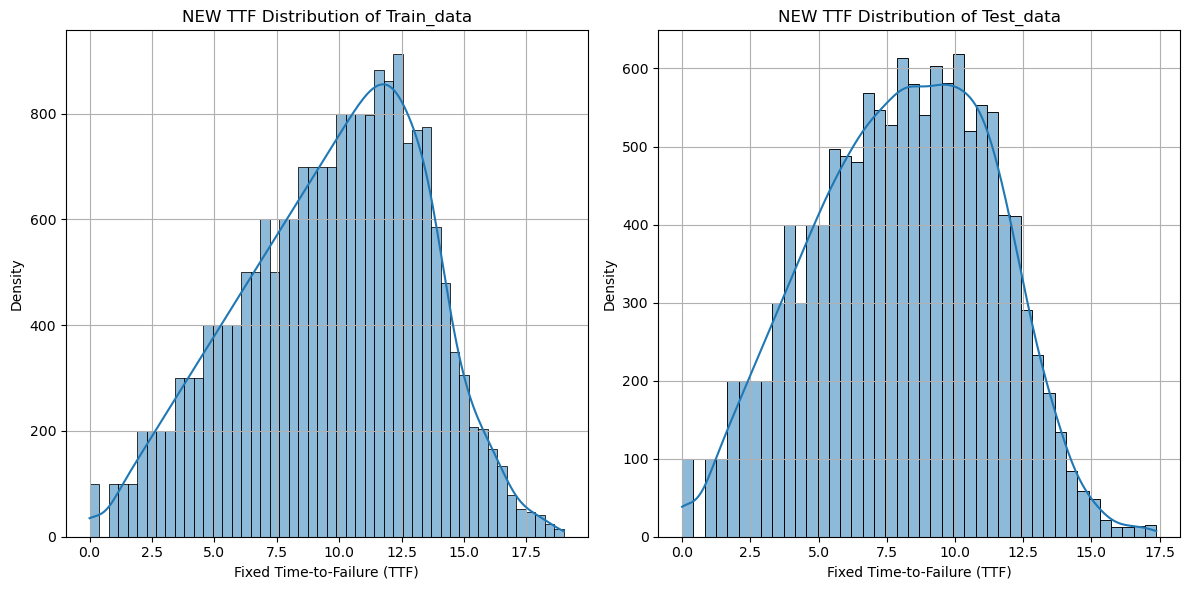

In [15]:
# Create subplots for both train_data['ttf_fixed'] and test_data['ttf_fixed']
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_data['ttf_fixed'], kde=True)
plt.xlabel('Fixed Time-to-Failure (TTF)')
plt.ylabel('Density')
plt.title('NEW TTF Distribution of Train_data')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(test_data['ttf_fixed'], kde=True)
plt.xlabel('Fixed Time-to-Failure (TTF)')
plt.ylabel('Density')
plt.title('NEW TTF Distribution of Test_data')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### The Skewness is gone

In [16]:
#Check if there are any NaN (Not a Number) values
print(np.any(np.isnan(y_train_fixed)))
print(np.any(np.isinf(y_train_fixed)))

False
False


 # 6. feature selection

 ## 6.1 Variance

In [17]:
# Calculate the variance of each feature
variances = train_data.var()

# Sort the variances Series in descending order
variances_sorted = variances.sort_values(ascending=False)

# Create a DataFrame from the sorted variances Series
variances_df = pd.DataFrame(variances_sorted, columns=['Variance'])

# Display the DataFrame
variances_df

Variance
cycle      4.744591e+03
ttf        4.744591e+03
id         8.542545e+02
s9         4.876536e+02
s14        3.639005e+02
s4         8.101089e+01
s3         3.759099e+01
ttf_fixed  1.343611e+01
s17        2.398667e+00
s7         7.833883e-01
s12        5.439850e-01
s2         2.500533e-01
s11        7.133568e-02
s20        3.266927e-02
s21        1.171825e-02
s13        5.172330e-03
s8         5.038938e-03
s15        1.406628e-03
setting1   4.784340e-06
s6         1.929279e-06
setting2   8.588541e-08
s1         4.273435e-21
s5         1.152399e-23
s10        2.172333e-25
s16        2.422479e-28
s18        0.000000e+00
s19        0.000000e+00
setting3   0.000000e+00

 #### from s15 on, the features seem to not change much in the model's performance

## 6.2 standard deviation 

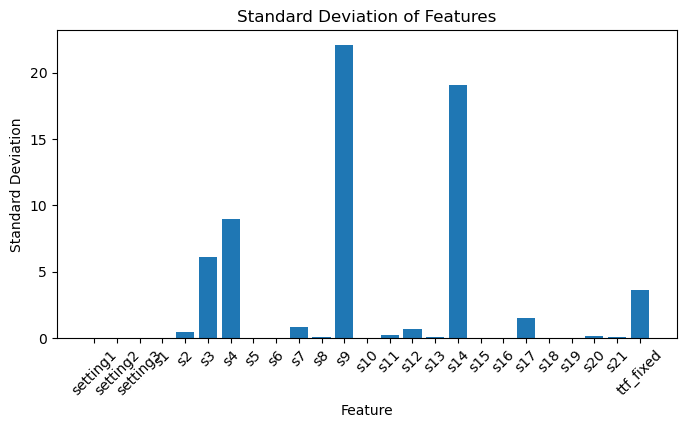

In [19]:
# Calculate the standard deviation for each feature
corr_data = pd.concat([X_train, y_train_fixed], axis=1)
std_dev = corr_data.std()

# Create a bar plot to visualize the standard deviation
plt.figure(figsize=(8, 4))
plt.bar(std_dev.index, std_dev.values)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Features")
plt.show()





### some features here like s9 and s14 can dominate the learning process due to its larger scale.

## 6.3 Correlation Matrix

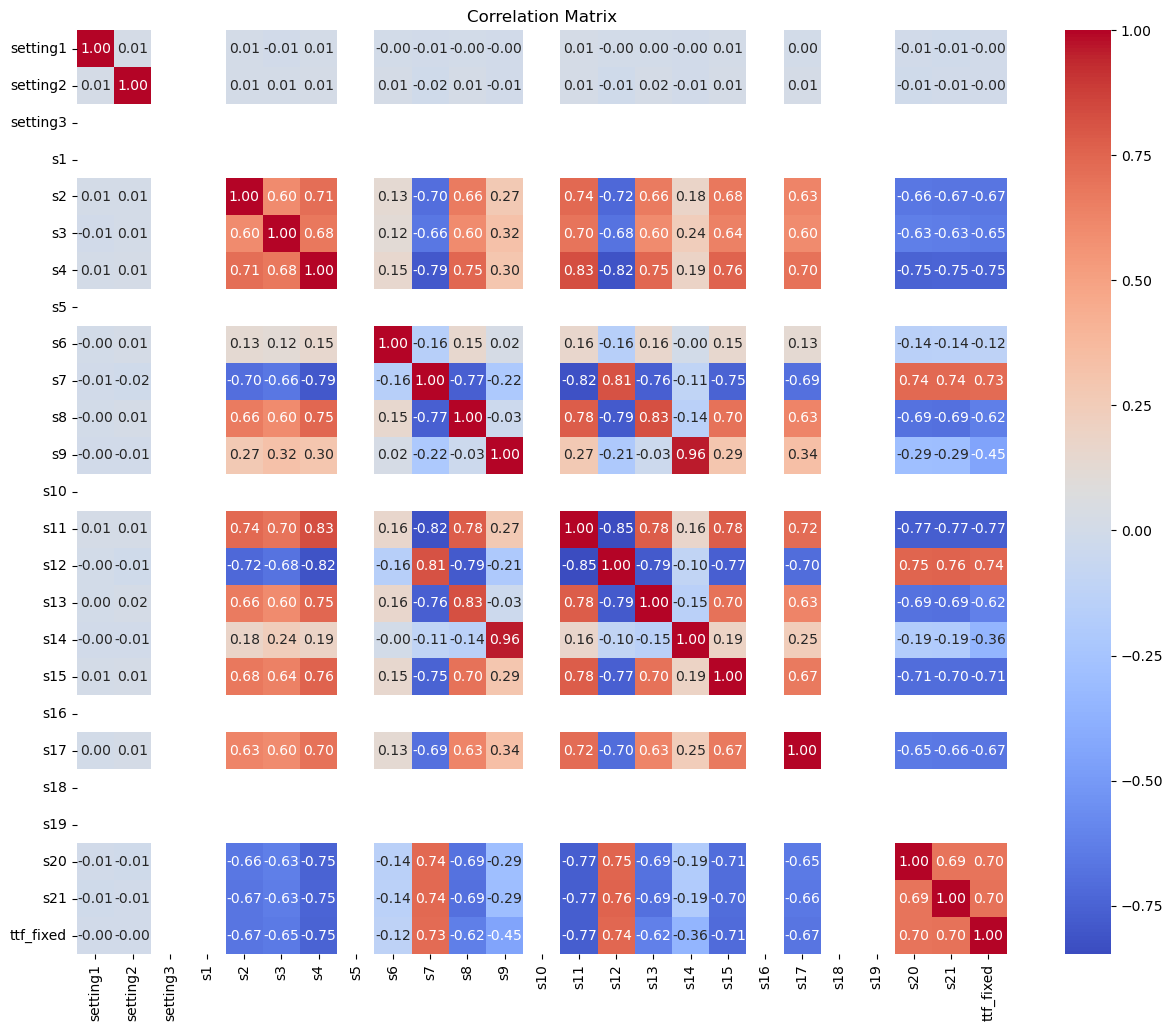

In [20]:
correlation_matrix = corr_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 6.4 Features = f(ttf)

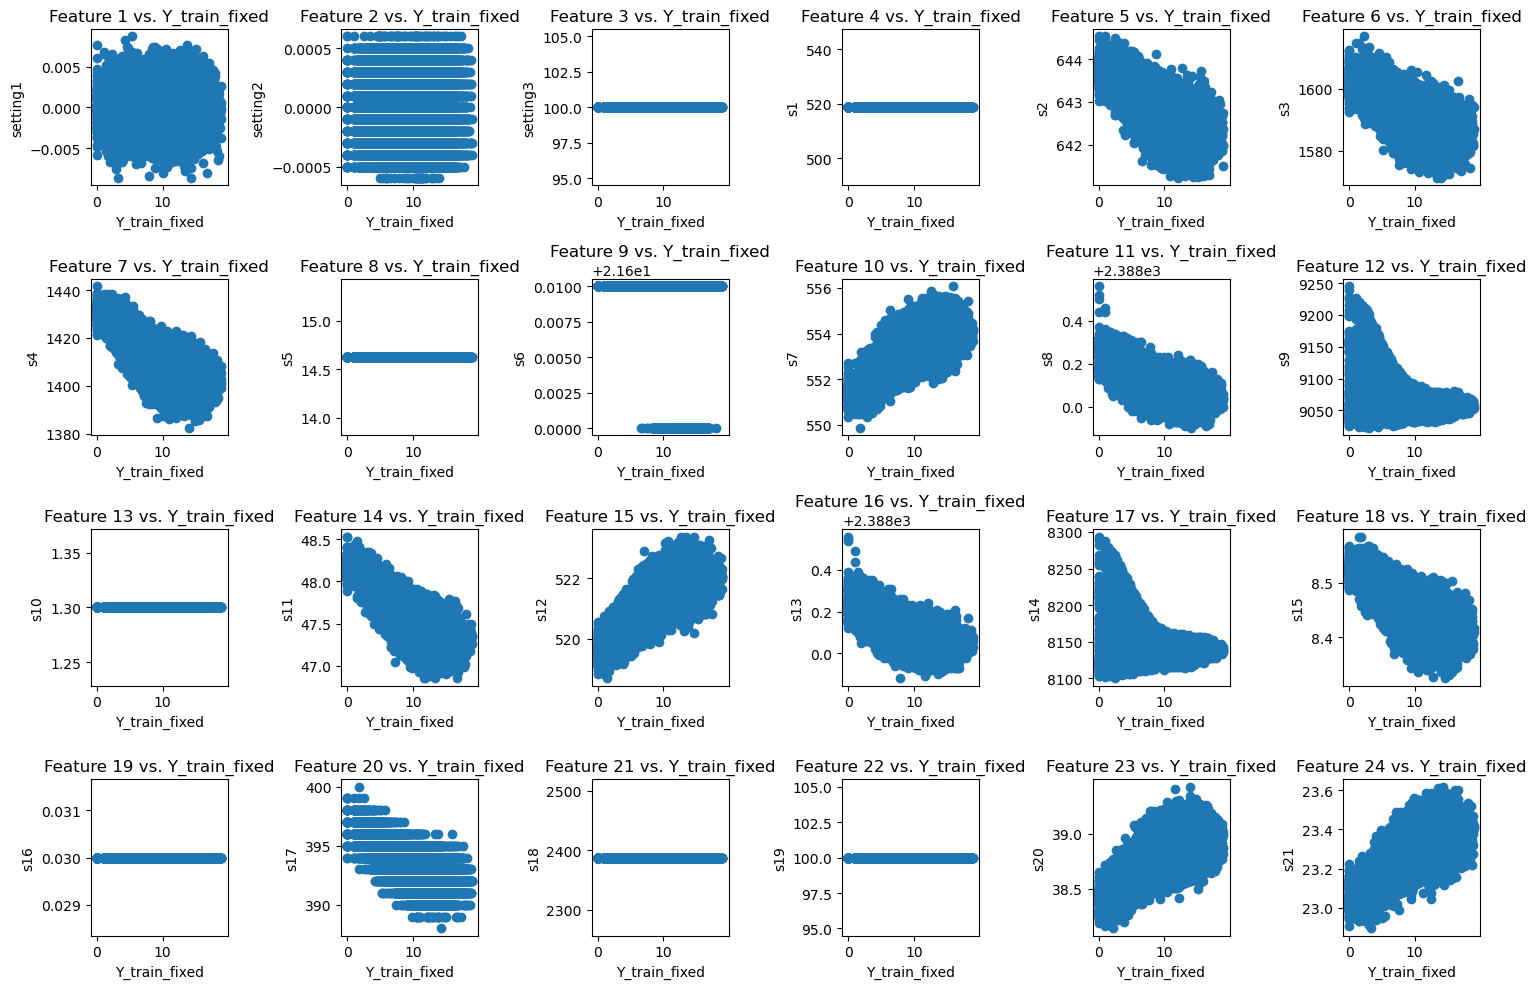

In [21]:
# Loop through each feature and create individual scatter plots against Y_train_fixed
num_features = X_train.shape[1] #nbr of columns=24
num_rows = 4  # Number of rows in the subplot grid
num_cols = (num_features + num_rows - 1) // num_rows  # Number of columns in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, ax in enumerate(axes.flat): #enumerate returns tuple(index,value)
    if i < num_features:
        feature_data = X_train.iloc[:, i]  # select column in X_train
        ax.scatter(y_train_fixed, feature_data)
        ax.set_xlabel("Y_train_fixed")
        ax.set_ylabel(X_train.columns[i])
        ax.set_title(f"Feature {i+1} vs. Y_train_fixed")
    else:
        ax.axis('off')  # Turn off the empty subplots if any

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

## 6.5 Box plot of the features


<Figure size 1200x800 with 0 Axes>

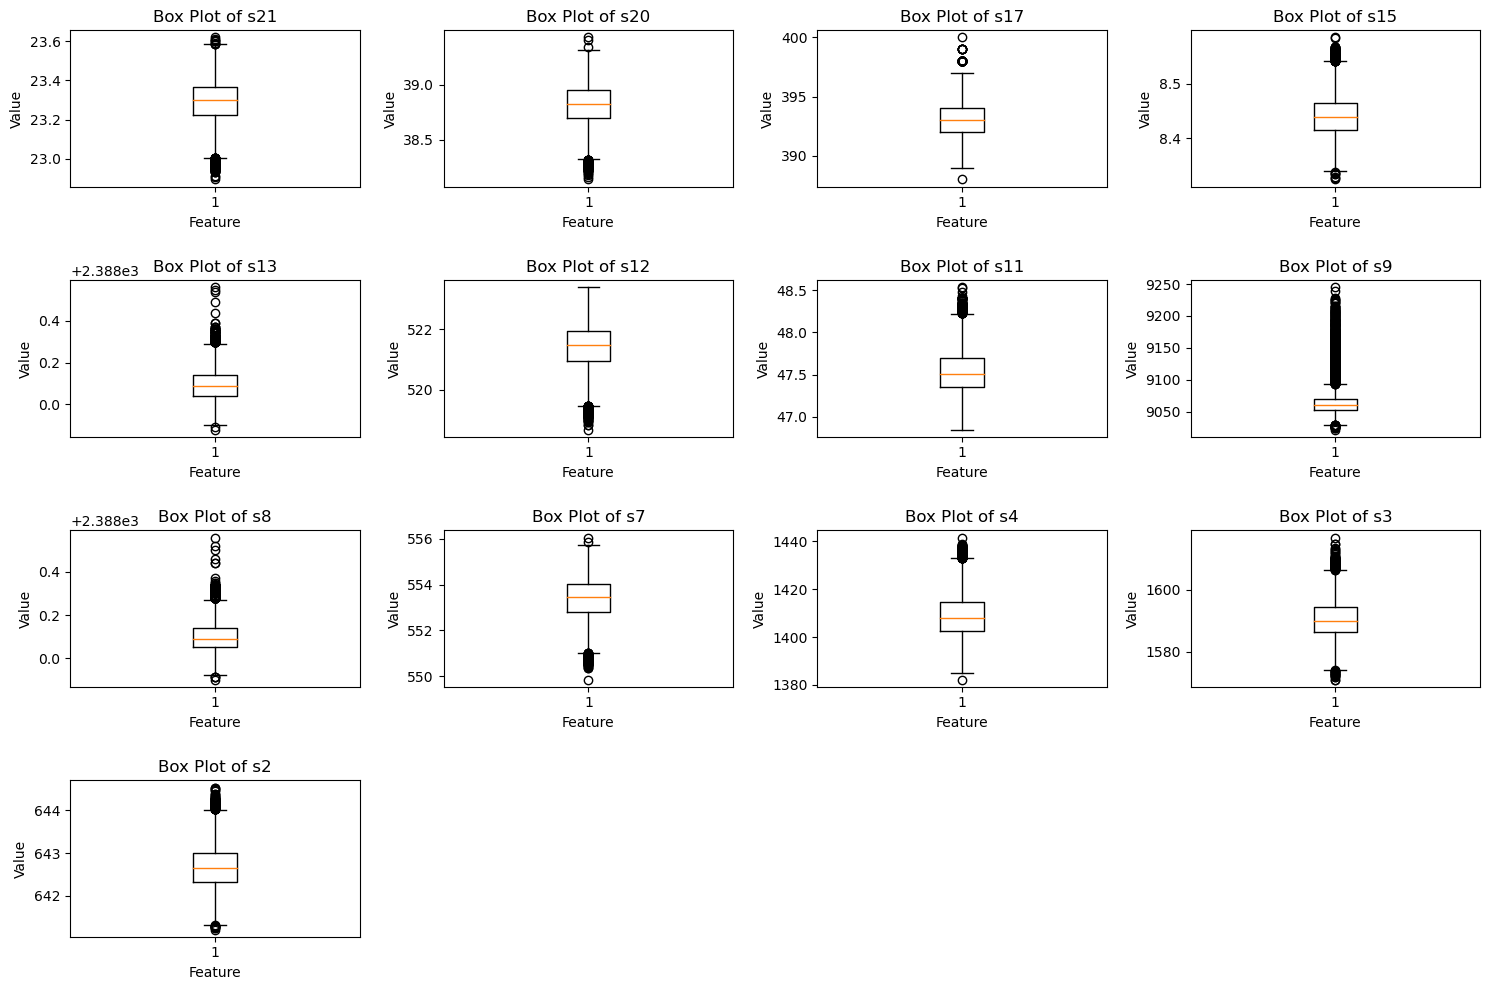

In [22]:
# Create individual box plots for each feature
plt.figure(figsize=(12, 8))
box_plot = corr_data[['s21', 's20', 's17', 's15', 's13', 's12', 's11', 's9', 's8', 's7', 's4', 's3', 's2']]
num_features = box_plot.shape[1]  # Number of columns=14
num_rows = 4  # Number of rows in the subplot grid
num_cols = (num_features + num_rows - 1) // num_rows  # Number of columns in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Loop through each feature column and create a box plot in the corresponding subplot
for i, column in enumerate(box_plot.columns):
    ax = axes[i]
    ax.boxplot(box_plot[column])
    ax.set_title(f"Box Plot of {column}")
    ax.set_xlabel("Feature")
    ax.set_ylabel("Value")

# Hide empty subplots, if any
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Conclusion
#### • ttf_fixed has high correlation with s21, s20, s12, s7, s4, s17, s15 
#### • s9 and s14 are repeated variables (0.96) we can keep s9 and discard s14
#### • we can also discard the 3 settings as well as s1, s5, s18, s19 and s10 (they do not affect the label and have very low variance)
#### • Many outliers in the dataset


## 7. Distribution

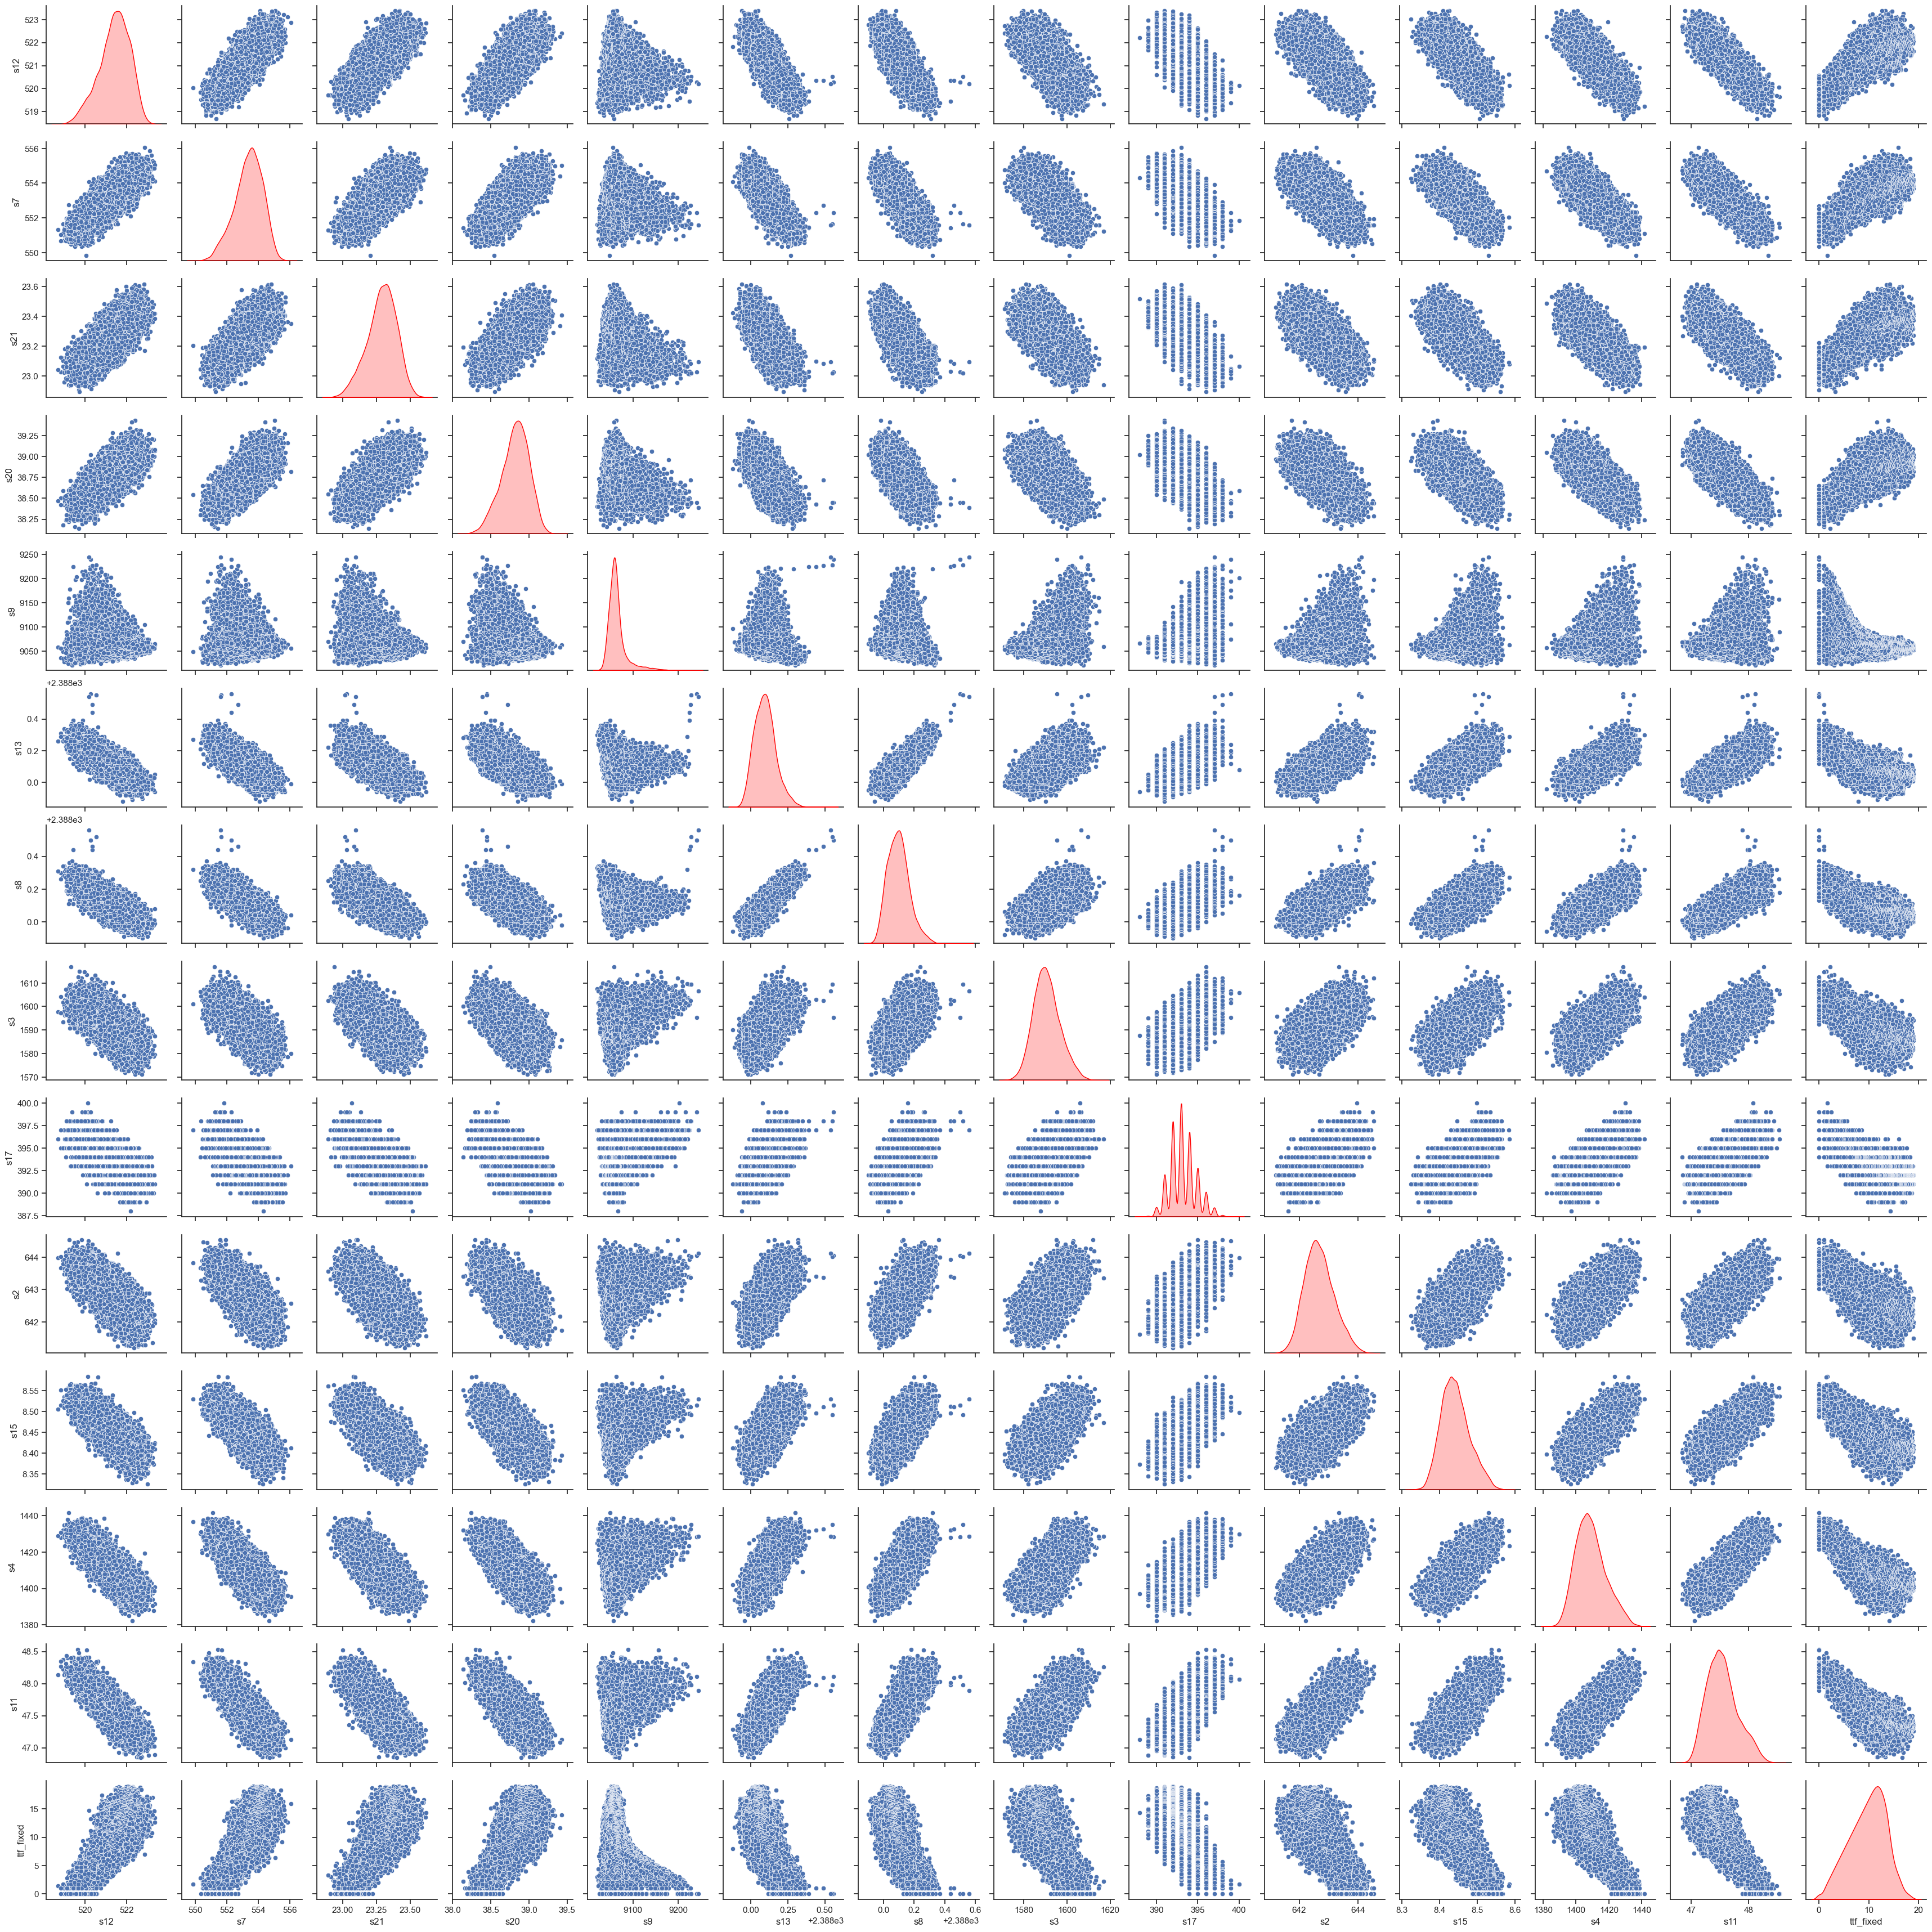

In [23]:
# Visualisation de la distribution des features and du label
feat_corr_ttf = ['s12', 's7', 's21', 's20', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
Visualisation_data = X_train[feat_corr_ttf].copy() #copy()pour ne pas modifier X_train originale
Visualisation_data['ttf_fixed'] = y_train_fixed
sns.set(style="ticks")

g = sns.pairplot(Visualisation_data, diag_kind='kde', diag_kws={'color': 'red'}) # kernel density estimate


## 8. Save the Final Data Set

In [30]:
final_train_data = train_data[['s12', 's21', 's20', 's13', 's8', 's3', 's7', 's17', 's2', 's15', 's4', 's11','ttf_fixed']]
final_test_data = test_data[['s12', 's21', 's20', 's13', 's8', 's3', 's7', 's17','s2', 's15', 's4', 's11','ttf_fixed']]

final_train_data.to_csv('final_train_data.csv', index=False)  # Set index=False to avoid saving the index column
final_test_data.to_csv('final_test_data.csv', index=False)  # Set index=False to avoid saving the index column